 Stock price prediction using LSTM

**Problem statement:**

Predicting the stock prices in the future is an important use-case in finance. If we can build a model with reasonable accuracy which can help us in predicting the movement of the stock prices for an asset, it can yield good returns. 

Let us use the LSTM network to predict stock prices for a security.

----

**Steps to perform for this project:**

1. Import the libraries
2. Download the data and check it
3. Data pre-processing
4. Creating the training and test data set
5. Define the features and the labels
6. Define the LSTM model
7. Training the LSTM Model
8. Model Evaluation
9. Visualizing the Predicted Prices

----

## Section 1: Import the libraries

Import the libraries with the aliases given in the brackets below.

_For downloading data_
- `yfinance` (yf)

_For data manipulation_
- `pandas` (pd)
- `numpy` (np)

_For mathematical operations_
- `math`

_For visualization_
- `matplotlib.pyplot` (plt)
- `rcParams` from `matplotlib.pylab`

_For data normalisation_
- `MinMaxScaler` from `sklearn.preprocessing`

_For building the model_
- `LSTM`, `Dropout`, `Dense` from `keras.layers`
- `Sequential` from `keras.models`

In [1]:
# For downloading data
import yfinance as yf

# For manipulating data
import pandas as pd
import numpy as np

# For mathematical operations
import math

# For visualization
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

# For data normalisation
from sklearn.preprocessing import MinMaxScaler

# For building the model
from keras.layers import LSTM, Dropout, Dense
from keras.models import Sequential

In [2]:
# # Settings the figsize parameter for the plots in this notebook to standardize the size of plots
%matplotlib inline
rcParams['figure.figsize'] = 20, 10

## Section 2: Download the data and check it

Download the last 10-years' historical data for Microsoft (`MSFT`) using `yfinance`.

In [6]:
ticker = 'BAJFINANCE.NS'
df = yf.download(ticker, period='5y')

[*********************100%***********************]  1 of 1 completed


In [7]:
# Check the dataset
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-02,4075.000000,4077.350098,3920.100098,3950.449951,3884.665527,2065404
2019-12-03,3939.949951,3995.000000,3886.500000,3964.550049,3898.530518,1984382
2019-12-04,3958.000000,4004.100098,3935.000000,3990.850098,3924.392822,1430830
2019-12-05,3990.850098,4034.000000,3968.000000,3990.850098,3924.392822,1255304
2019-12-06,4010.000000,4027.800049,3927.399902,3951.649902,3885.845459,1171355


In [8]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-11-26,6722.0,6739.799805,6608.450195,6617.950195,6617.950195,663278
2024-11-27,6650.0,6733.299805,6612.250000,6705.200195,6705.200195,642010
2024-11-28,6714.0,6726.250000,6495.000000,6509.399902,6509.399902,1576882
2024-11-29,6519.0,6609.000000,6510.350098,6575.899902,6575.899902,709643
2024-12-02,6595.0,6665.000000,6491.000000,6650.649902,6650.649902,920151


In [9]:
# Check the number of rows and columns in the dataframe
df.shape

(1239, 6)

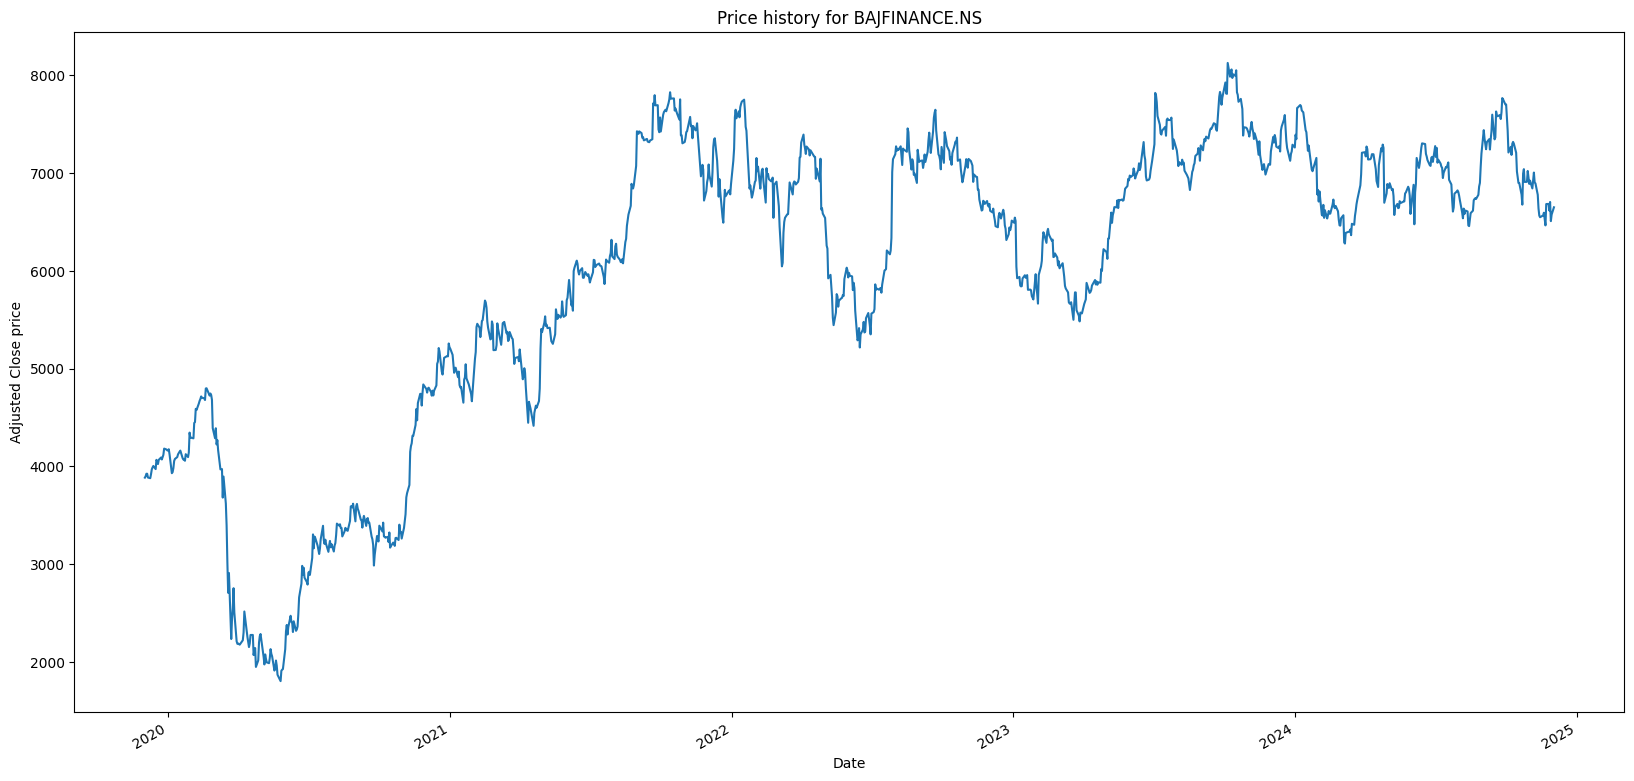

In [10]:
# Plot the adjusted close price
df['Adj Close'].plot()
plt.ylabel('Adjusted Close price')
plt.title(f'Price history for {ticker}')
plt.show()

## Section 3: Data pre-processing

### Filter the dataset

Create a new dataframe with just the adjusted close prices because we will be working only with this data.

In [11]:
# Create a dataframe with just the Adj Close prices
df1 = df['Adj Close']

In [12]:
# Check the filtered dataset
df1.head()

Date
2019-12-02    3884.665527
2019-12-03    3898.530518
2019-12-04    3924.392822
2019-12-05    3924.392822
2019-12-06    3885.845459
Name: Adj Close, dtype: float64

In [13]:
# Check the number of rows and columns in the filtered dataset
df1.shape

(1239,)

Rename the column to 'Close' for convenience. It is named as 'Adj Close' currently.

In [14]:
# Rename the column to Close for convenience
df1.rename('Close', inplace=True)

Date
2019-12-02    3884.665527
2019-12-03    3898.530518
2019-12-04    3924.392822
2019-12-05    3924.392822
2019-12-06    3885.845459
                 ...     
2024-11-26    6617.950195
2024-11-27    6705.200195
2024-11-28    6509.399902
2024-11-29    6575.899902
2024-12-02    6650.649902
Name: Close, Length: 1239, dtype: float64

### Normalize the filtered dataset

Create an array called `prices` with the values of all the close prices from the filtered dataframe.

In [15]:
prices = df1.values

In [16]:
# Check the prices array
prices

array([3884.66552734, 3898.53051758, 3924.39282227, ..., 6509.39990234,
       6575.89990234, 6650.64990234])

Do the following:
- Reshape the `prices` array with `newshape` as (1, -1)
<br>**Note**- _The new shape should be compatible with the original shape. If an integer, then the result will be a 1-D array of that length. One shape dimension can be -1. In this case, the value is inferred from the length of the array and remaining dimensions_
- Normalize the data to values between 0 and 1 using `MinMaxScaler`and save it as `scaled_prices`. Remember, that the feature range has to be passed as a tuple.

In [17]:
# Normalize the data to values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices.reshape(-1, 1))

In [18]:
# Check the scaled prices array
scaled_prices

array([[0.32916451],
       [0.33135658],
       [0.33544544],
       ...,
       [0.74413763],
       [0.75465134],
       [0.76646939]])

## Section 4: Creating the training and test data set

We want 80% of the data for training the model, and 20% for the test data set. So, compute the number of records that are required for the training data set. 

In [19]:
# Computing the number of records we want in the training data set
train_len = math.ceil(len(prices) * 0.8)
train_len

992

Create the training data set with the first 'n' rows of the scaled prices, where 'n' is the number of records required in the training data set, computed above.

In [20]:
# Create the training data set with the first n rows of the scaled prices
# n is the number of records required in the training data set, computed above

train_data = scaled_prices[0:train_len, :]

## Section 5: Define the features and the labels

We should input our data in the form of a 3D array to the LSTM model. First, we create data in 60 timesteps before using numpy to convert it into an array. Finally, we convert the data into a 3D array with X_train samples, 60 timestamps, and one feature at each step.

Do the following steps:

1. Create an empty list for the features `x_train` and labels `y_train`.
2. Create a 60-days window of historical prices as our feature data `x_train` and the following 60-days window as label data `y_train`.

In [21]:
# Create an empty list for the feature data and label data
x_train, y_train = [], []

# Create a 60-days window of historical prices (i-60) as our feature data (x_train) and the following 60-days window as label data (y_train).
for i in range(60, len(train_data)):
    x_train.append(scaled_prices[i-60:i, 0])
    y_train.append(scaled_prices[i, 0])

3. Convert the features (x_train) and labels (y_train) into `Numpy` arrays as required by `Tensorflow` when training a neural network model. 

4. Reshape the x_train into a three-dimensional array as `LSTM` supports three-dimensional input.

In [22]:
# Convert the x_train and y_train into numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape into a three-dimensional array
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

5. Extract the closing prices from our normalized dataset (the last 20% of the dataset).

6. Similar to the training set, create feature data (x_test) and label data (y_test) from our test set.

7. Convert the feature data (x_test) and label data (y_test) into Numpy array. Reshape again the x_test and y_test into a three-dimensional array

In [23]:
test_data = scaled_prices[train_len-60:, :]
x_test = []
y_test = prices[train_len:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

## Section 6: Define the LSTM model

Now, you are ready to use the open-source machine learning library, Tensorflow, to set up our LSTM network architecture.

Write code for the following:
1. Define a Sequential model which consists of a linear stack of layers.
2. Add a LSTM layer by giving it 100 network units. Set the return_sequence to true so that the output of the layer will be another sequence of the same length.
3. Add another LSTM layer with also 100 network units. But we set the return_sequence to false for this time to only return the last output in the output sequence.
4. Add a densely connected neural network layer with 25 network units.
5. At last, add a densely connected layer that specifies the output of 1 network unit.
6. Show the summary of this LSTM network architecture.

In [28]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input

# Define a Sequential model
model = Sequential()

# Add an Input layer
model.add(Input(shape=(x_train.shape[1], 1)))

# Add the first LSTM layer
model.add(LSTM(100, return_sequences=True))

# Add the second LSTM layer
model.add(LSTM(100, return_sequences=False))

# Add a densely connected neural network layer with 25 units
model.add(Dense(25))

# Add the output layer with 1 unit
model.add(Dense(1))

# Show the summary of the LSTM network architecture
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 60, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           2,525 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 123,751 (483.40 KB)

 Trainable params: 123,751 (483.40 KB)

 Non-trainable params: 0 (0.00 B)

## Section 7: Training the LSTM Model

You are almost ready to train your LSTM model by fitting it with the training set. But before that, you have to set an optimizer and a loss function for the model.

Do the following:
- Adopt `adam` optimizer and set the mean square error as loss function. You need to use the `compile()` method for this. Pass 'adam' to the `optimizer` parameter, and 'mean_squared_error' to the `loss` parameter.

- Train the model by fitting it with the training set. We can try with batch_size of 1 and run the training for 3 epochs. Use the model `fit()` method for it.

In [29]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=3)

Epoch 1/3
932/932 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0133
Epoch 2/3
932/932 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0021
Epoch 3/3
932/932 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0013


## Section 8: Model Evaluation

Now, you need to evaluate your trained LSTM model with the test set. Examine the performance of the model using the root mean square error (RMSE) metric.

Here are the steps:
1. Apply the model to predict the stock prices based on the test set using the `predict()` method.
2. Use the `inverse_transform()` method to denormalize the predicted stock prices.
3. Apply the RMSE formula to calculate the degree of discrepancy between the predicted prices and real prices (y_test) and display the result

In [30]:
# Apply the model to predict the stock prices based on the test set
predictions = model.predict(x_test)
# Use the inverse_transform method to denormalize the predicted stock prices
predictions = scaler.inverse_transform(predictions)
# Apply the RMSE formula to evaluate the correctness of the predictions
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


219.92362846343624

## Section 9: Visualizing the Predicted Prices

It is always helpful to visualize the predicted prices in a graphical way. Plot the predicted stock price and the real stock price using Matplolib.

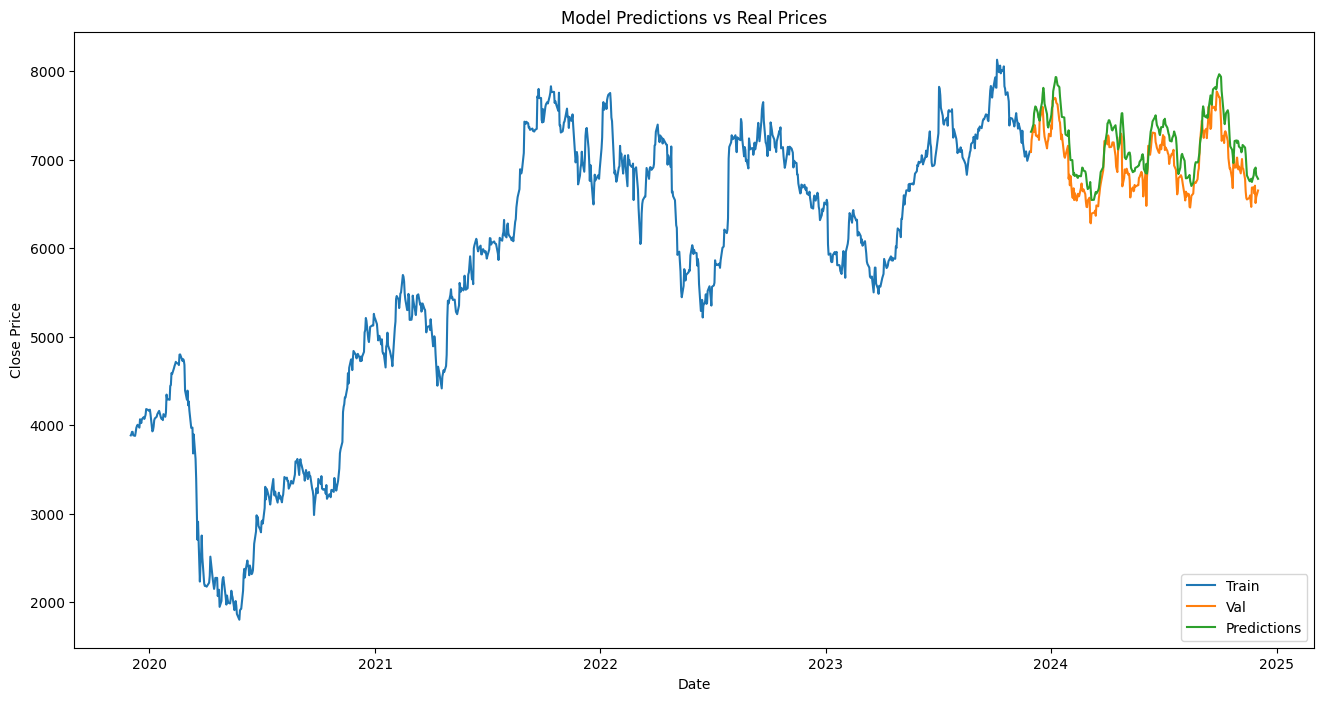

In [31]:
# Filter the Adj Close prices into a
data = df.filter(['Adj Close'])
train = data[:train_len].copy()
validation = data[train_len:].copy()
validation['Predictions'] = predictions
plt.figure(figsize=(16, 8))
plt.title('Model Predictions vs Real Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train)
plt.plot(validation[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()